# rdkit 可视化
## 单个展示
从`mol`对象到图片：`MolToImage(mol, size, kekulize, wedgeBonds, fitImage, …)`              
`mol`：mol对象             
`size`：图片尺寸，默认(300, 300)             
`kekulize`：是否展示kekule形式，默认True（True：芳香系统用实线表示，False：虚线表示）        
`wedgeBonds`：是否展示楔形键，即立体构型，默认True            

In [31]:
import pandas  as pd
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

In [9]:
Chem.Draw.MolToImage?

Signature:
Chem.Draw.MolToImage(
    mol,
    size=(300, 300),
    kekulize=True,
    wedgeBonds=True,
    fitImage=False,
    options=None,
    canvas=None,
    **kwargs,
)
Docstring:
Returns a PIL image containing a drawing of the molecule

ARGUMENTS:

  - kekulize: run kekulization routine on input `mol` (default True)

  - size: final image size, in pixel (default (300,300))

  - wedgeBonds: draw wedge (stereo) bonds (default True)

  - highlightAtoms: list of atoms to highlight (default [])

  - highlightBonds: list of bonds to highlight (default [])

  - highlightColor: RGB color as tuple (default [1, 0, 0])

NOTE:

      use 'matplotlib.colors.to_rgb()' to convert string and
      HTML color codes into the RGB tuple representation, eg.

        from matplotlib.colors import ColorConverter
        img = Draw.MolToImage(m, highlightAtoms=[1,2], highlightColor=ColorConverter().to_rgb('aqua'))
        img.save("molecule.png")

RETURNS:

  a PIL Image object
File:      ~/anaconda3/en

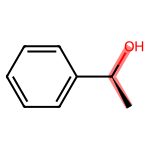

In [14]:
mol = Chem.MolFromSmiles("C[C@H](O)c1ccccc1")
image = Chem.Draw.MolToImage(mol, size=(150,150), kekulize=True, highlightBonds=[0,1])
image

In [15]:
## 保存
image.save("./data/im.png")

在新窗口中展示图片：`ShowMol()`


In [17]:
Draw.ShowMol?

Signature:
Draw.ShowMol(
    mol,
    size=(300, 300),
    kekulize=True,
    wedgeBonds=True,
    title='RDKit Molecule',
    stayInFront=True,
    **kwargs,
)
Docstring:
Generates a picture of a molecule and displays it in a Tkinter window
  
File:      ~/anaconda3/envs/gnn/lib/python3.8/site-packages/rdkit/Chem/Draw/__init__.py
Type:      function


In [18]:
Draw.ShowMol(mol, size=(150,150), kekulize=False)

TclError: no display name and no $DISPLAY environment variable

保存图片`MolToFile(mol, filename, size, kekulize, wedgeBonds, …)`        
参数基本同上

In [19]:
Draw.MolToFile(mol, 'data/output.png', size=(150, 150))

## 批量展示
### 从DataFrame中展示
从df中展示：`FrameToGridImage(frame, column, molsPerRow, subImgSize, legendsCol, …)`                   
`frame`：DataFrame对象                  
`column`：rdkit mol对象所在列                      
`molsPerRow`,：每行显示的分子数                
`subImgSize`：图片大小                
`legendsCol`：标题所在列              


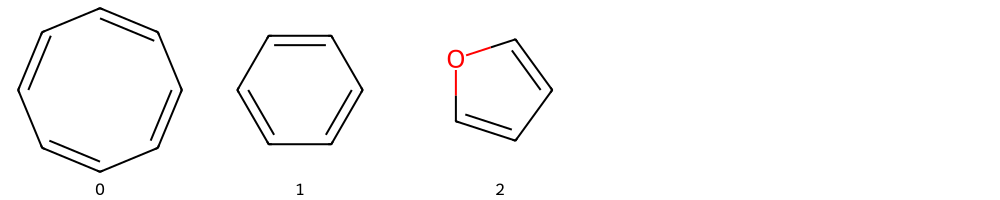

In [22]:

df = pd.read_csv('./data/batch.csv')
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','mol',includeFingerprints=True)
PandasTools.FrameToGridImage(df, column='mol', molsPerRow=5, subImgSize=(200,200), legendsCol='Name')

从mol列表中展示             
从列表生成分子结构：`MolsToGridImage(mols, maxMols, molsPerRow, subImgSize, legends, …)`       
部分参数和上面的一致          
`mols`：mol对象列表        
`maxMols`：最多显示的分子数        
`molsPerRow`,：每行显示的分子数         
`subImgSize`：图片大小        
`legends`：图题         


In [24]:
Draw.MolsToGridImage?

Signature:
Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(200, 200),
    legends=None,
    highlightAtomLists=None,
    highlightBondLists=None,
    useSVG=False,
    returnPNG=False,
    **kwargs,
)
Docstring: <no docstring>
File:      ~/anaconda3/envs/gnn/lib/python3.8/site-packages/rdkit/Chem/Draw/__init__.py
Type:      function


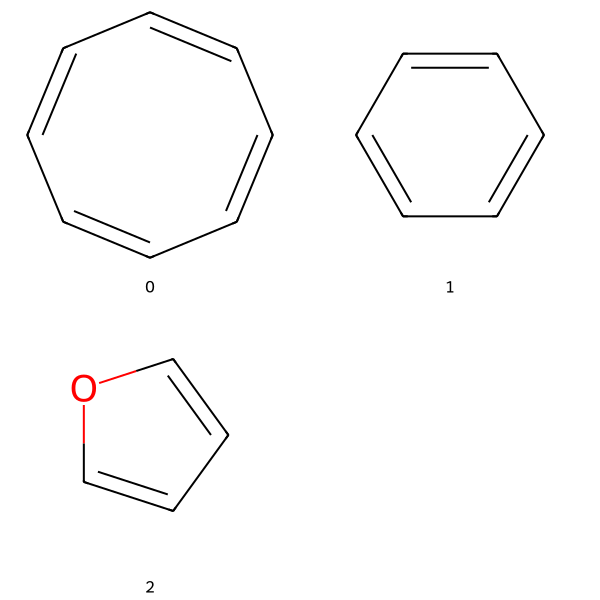

In [41]:
mols = df.mol.tolist()
legends = df.Name.tolist()
legends = [str(l) for l in legends]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300,300), legends=legends)  

## 3D展示

转换3D时，为了得到靠谱的三维构象，一般先加氢：`AddHs(mol)`             
通过距离几何算法计算3D坐标：`EmbedMolecule(mol, randomSeed, …)`                 
`mol`：mol对象       
`randomSeed`：随机种子           
转换完后再进行一步力场优化，比如MMFF94：`MMFFOptimizeMolecule(mol)`     


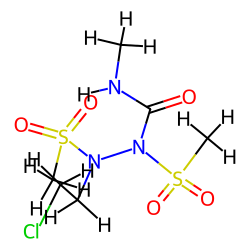

In [32]:
m3d = Chem.MolFromSmiles('CNC(=O)N(N(CCCl)S(C)(=O)=O)S(C)(=O)=O')
m3d = Chem.AddHs(m3d)
AllChem.EmbedMolecule(m3d, randomSeed=3) # 利用EmbedMolecule模块将二维分子图转化为三维分子坐标
AllChem.MMFFOptimizeMolecule(m3d) # 利用MMFFOptimizeMolecule模块对分子结构进行简单优化
Draw.MolToImage(m3d, size=(250,250))

